In [10]:
import os
from datetime import datetime,timezone,timedelta
from csv import reader

import numpy as np
import pandas as pd
from astropy.timeseries import LombScargle

import matplotlib.pyplot as plt

from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [11]:
main_path = os.path.abspath('../data/20221031/3/')


azimut_mask = [270,330]
elevation_mask = [0,50]
min_height = 2
max_height = 6
frequency = dapr.generate_frequency(min_height=min_height,max_height=max_height)

starttime = datetime(year=2022,month=10,day=31,hour=8,minute=0,second=0,tzinfo=timezone.utc)
endtime = datetime(year=2022,month=10,day=31,hour=14,minute=0,second=0,tzinfo=timezone.utc)
deltatime = timedelta(minutes=20)


data_dict = dafi.clean_data(main_path,azimut_mask=azimut_mask,elevation_mask=elevation_mask,sn1_trigger=True)


split_data_dict = dafi.split_data(data_dict,starttime,endtime,deltatime)

In [12]:
result_dict = dapr.data_prepare(split_data_dict,frequency=frequency)

In [13]:
result_dict = dapr.extract_height_as_max_peak(result_dict,frequency=frequency)

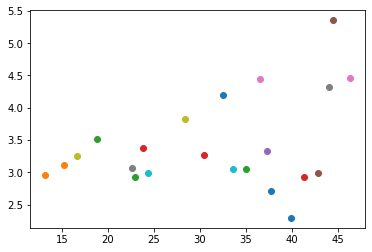

In [14]:
for satellite_code in result_dict:
    for i,height in enumerate(result_dict[satellite_code]['maximal_height']):
        plt.scatter(result_dict[satellite_code]['elevation'][i]['avg'],height)

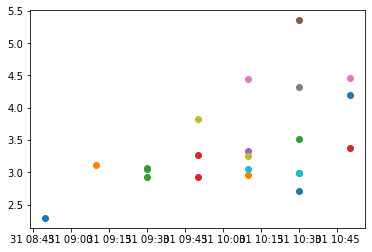

In [15]:
for satellite_code in result_dict:
    for i,height in enumerate(result_dict[satellite_code]['maximal_height']):
        plt.scatter(result_dict[satellite_code]['time'][i],height)

In [16]:
result_dict

{'G06': {'raw': [                          time   azimut  elevation   snr1   snr2
   551  2022-10-31 08:40:01+00:00  309.053     35.922  47.40  41.40
   552  2022-10-31 08:40:02+00:00  309.051     35.929  47.55  41.20
   553  2022-10-31 08:40:03+00:00  309.049     35.936  47.60  41.40
   554  2022-10-31 08:40:04+00:00  309.047     35.943  47.55  41.25
   555  2022-10-31 08:40:05+00:00  309.045     35.950  47.35  41.05
   ...                        ...      ...        ...    ...    ...
   1746 2022-10-31 08:59:56+00:00  305.140     43.922  48.75  42.80
   1747 2022-10-31 08:59:57+00:00  305.135     43.929  48.85  42.55
   1748 2022-10-31 08:59:58+00:00  305.131     43.935  48.95  42.05
   1749 2022-10-31 08:59:59+00:00  305.126     43.942  48.90  42.00
   1750 2022-10-31 09:00:00+00:00  305.122     43.948  48.95  42.10
   
   [1200 rows x 5 columns]],
  'time': [Timestamp('2022-10-31 08:50:00+0000', tz='UTC')],
  'power': [array([0.25774535, 0.25845411, 0.2591614 , ..., 0.04894744, 0.04

In [17]:

'''
try:
    para = np.dot(np.linalg.solve(np.dot(design_matrix.T,design_matrix),\
                design_matrix.T),snr_sort)
except:
    height = []
    frequency = float("nan")
    power = float("nan")
else:
    snr_ref = snr_sort - (elevation_sort**2 * para[0,0] + \
                para[1,0]*elevation_sort + para[2,0])

    # lsp analysis
    x_data = (np.sin(elevation_sort.T*np.pi/180) * 4 * np.pi / wavelength).ravel()
    y_data = snr_ref.ravel()
    frequency = np.arange(min_height,max_height,0.001)

    power = signal.lombscargle(x_data,y_data,frequency,normalize=True)
    plt.plot(frequency,power)
    peaks,_= signal.find_peaks(power)
    if peaks.size != 0:
        peaks_power = power[peaks]

        height_peak = frequency[peaks]
        height = height_peak[peaks_power==max(peaks_power)]
    else:
        height = []
'''

'\ntry:\n    para = np.dot(np.linalg.solve(np.dot(design_matrix.T,design_matrix),                design_matrix.T),snr_sort)\nexcept:\n    height = []\n    frequency = float("nan")\n    power = float("nan")\nelse:\n    snr_ref = snr_sort - (elevation_sort**2 * para[0,0] +                 para[1,0]*elevation_sort + para[2,0])\n\n    # lsp analysis\n    x_data = (np.sin(elevation_sort.T*np.pi/180) * 4 * np.pi / wavelength).ravel()\n    y_data = snr_ref.ravel()\n    frequency = np.arange(min_height,max_height,0.001)\n\n    power = signal.lombscargle(x_data,y_data,frequency,normalize=True)\n    plt.plot(frequency,power)\n    peaks,_= signal.find_peaks(power)\n    if peaks.size != 0:\n        peaks_power = power[peaks]\n\n        height_peak = frequency[peaks]\n        height = height_peak[peaks_power==max(peaks_power)]\n    else:\n        height = []\n'